In [1]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [2]:
def load_scws(rid):
    
    df1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_scw_envs_df.csv")
    df1 = df1.set_index(pd.DatetimeIndex(df1.dt_utc))
    df1["cluster_new"] = df1.cluster.map({1:2,2:1,0:0})    
    df1["month"] = df1.index.month
    df1["hour"] = df1.index.hour
    df1["rid"] = rid
    df1["wgr"] = df1.gust / df1.speed
    maps = {"2":"Melbourne","66":"Brisbane","69":"Namoi","70":"Perth","71":"Sydney"}
    df1["location"] = df1.rid.map(maps)
    return df1

melb = load_scws("2")
bris = load_scws("66")
namoi = load_scws("69")
perth = load_scws("70")
syd = load_scws("71")
df = pd.concat([melb,perth,syd,namoi,bris],axis=0)

         Umean06    speed
Umean06  1.00000  0.47327
speed    0.47327  1.00000
          Umean06     speed
Umean06  1.000000  0.686263
speed    0.686263  1.000000
          Umean06     speed
Umean06  1.000000  0.441707
speed    0.441707  1.000000
          Umean06     speed
Umean06  1.000000  0.278722
speed    0.278722  1.000000
Storm motion...is largely dictated by the mean environmental wind in single cell or multicell thunderstorms;
 in supercells,pressure perturbations owing to environmental vertical wind shear also play a considerable role in controlling storm motion (Sherb 2021)


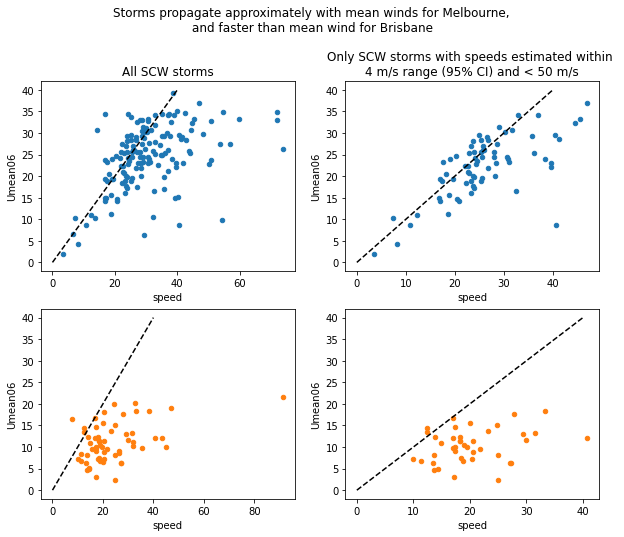

In [3]:
plt.figure(figsize=[10,8])

ax=plt.subplot(2,2,1)
melb.plot(kind="scatter",y="Umean06",x="speed",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(melb[["Umean06","speed"]].corr(method="pearson"))
plt.title("All SCW storms")

ax=plt.subplot(2,2,2)
melb.query("(speed_rnge<4) & (speed<50)").plot(kind="scatter",y="Umean06",x="speed",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(melb.query("(speed_rnge<4) & (speed<50)")[["Umean06","speed"]].corr(method="pearson"))
plt.title("Only SCW storms with speeds estimated within \n4 m/s range (95% CI) and < 50 m/s")
    
ax=plt.subplot(2,2,3)
bris.plot(kind="scatter",y="Umean06",x="speed",color="tab:orange",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(bris[["Umean06","speed"]].corr(method="pearson"))

ax=plt.subplot(2,2,4)
bris.query("(speed_rnge<4) & (speed<50)").plot(kind="scatter",y="Umean06",x="speed",color="tab:orange",ax=ax)
plt.plot([0,40],[0,40],color="k",ls="--")
print(bris.query("(speed_rnge<4) & (speed<50)")[["Umean06","speed"]].corr(method="pearson"))

plt.suptitle("Storms propagate approximately with mean winds for Melbourne,\n and faster than mean wind for Brisbane")
plt.subplots_adjust(top=0.85)

print("Storm motion...is largely dictated by the mean environmental wind in single cell or multicell thunderstorms;\n in supercells,\
pressure perturbations owing to environmental vertical wind shear also play a considerable role in controlling storm motion (Sherb 2021)")

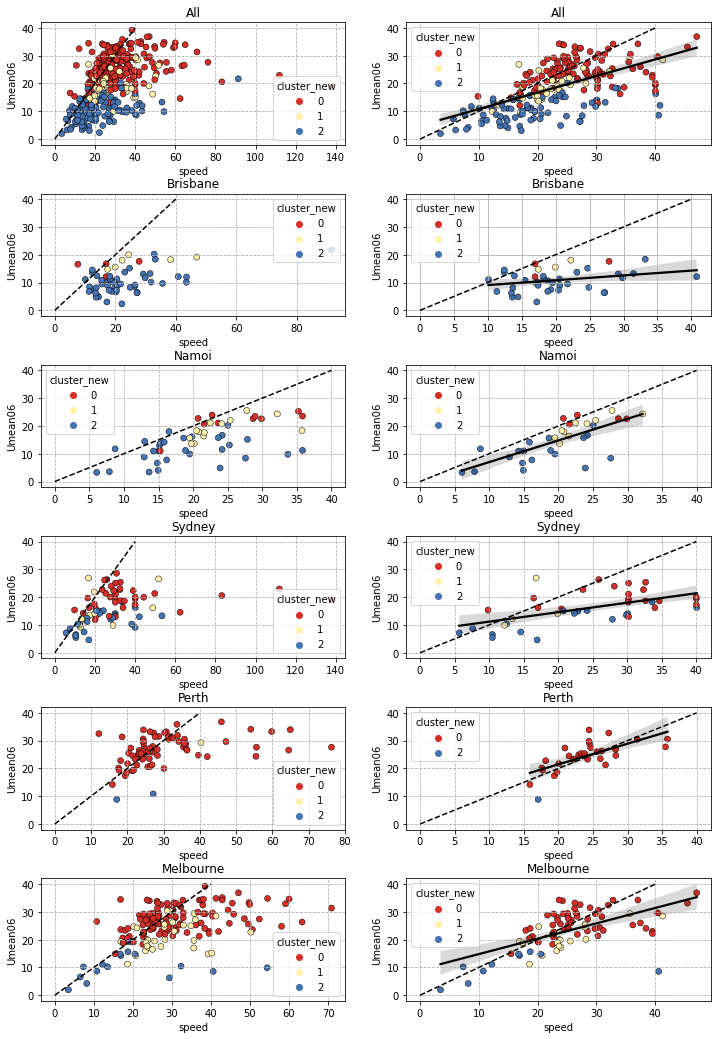

In [8]:
plt.figure(figsize=[12,18])

p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

ax=plt.subplot(6,2,1)
sns.scatterplot(data=df,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("All")

ax=plt.subplot(6,2,2)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("All")

ax=plt.subplot(6,2,3)
sns.scatterplot(data=bris,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Brisbane")

ax=plt.subplot(6,2,4)
sns.scatterplot(data=bris.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=bris.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid()
plt.title("Brisbane")

ax=plt.subplot(6,2,5)
sns.scatterplot(data=namoi,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Namoi")

ax=plt.subplot(6,2,6)
sns.scatterplot(data=namoi.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=namoi.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Namoi")

ax=plt.subplot(6,2,7)
sns.scatterplot(data=syd,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Sydney")

ax=plt.subplot(6,2,8)
sns.scatterplot(data=syd.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=syd.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Sydney")

ax=plt.subplot(6,2,9)
sns.scatterplot(data=perth,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Perth")

ax=plt.subplot(6,2,10)
sns.scatterplot(data=perth.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=[p[0],p[2]],edgecolor="k")
sns.regplot(data=perth.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Perth")

ax=plt.subplot(6,2,11)
sns.scatterplot(data=melb,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Melbourne")

ax=plt.subplot(6,2,12)
sns.scatterplot(data=melb.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=melb.query("(speed_rnge<4) & (speed<50)"),x="speed",y="Umean06",scatter=False,ax=ax,color="k")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("Melbourne")

plt.subplots_adjust(hspace=0.4)



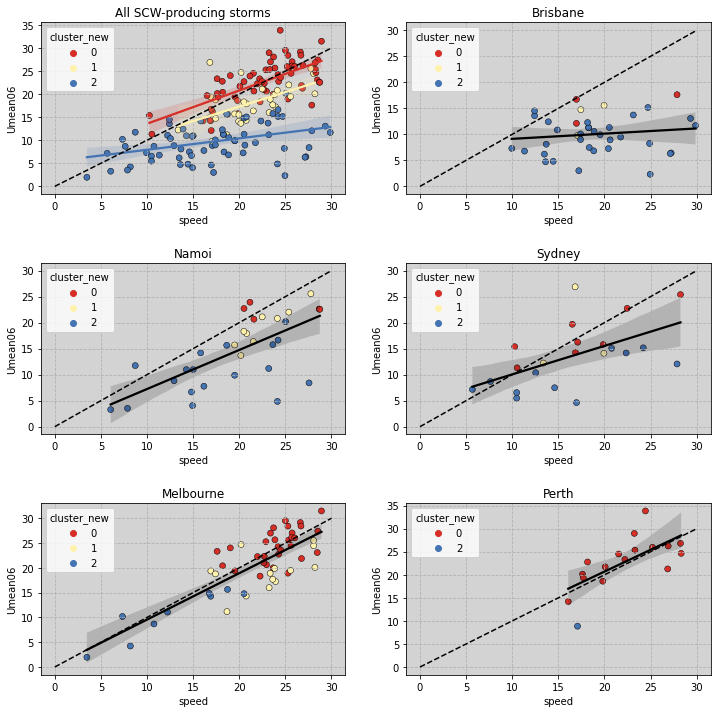

In [4]:
plt.figure(figsize=[12,12])

p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

ax=plt.subplot(3,2,1)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("All SCW-producing storms")

ax=plt.subplot(3,2,2)
sns.scatterplot(data=bris.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=bris.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Brisbane")

ax=plt.subplot(3,2,3)
sns.scatterplot(data=namoi.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=namoi.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Namoi")

ax=plt.subplot(3,2,4)
sns.scatterplot(data=syd.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=syd.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Sydney")

ax=plt.subplot(3,2,5)
sns.scatterplot(data=melb.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=melb.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Melbourne")

ax=plt.subplot(3,2,6)
sns.scatterplot(data=perth.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=[p[0],p[2]],edgecolor="k")
sns.regplot(data=perth.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",scatter=False,color="k",ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("Perth")

plt.subplots_adjust(hspace=0.4)
plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_speed_plot.jpeg",dpi=1000,bbox_inches="tight")

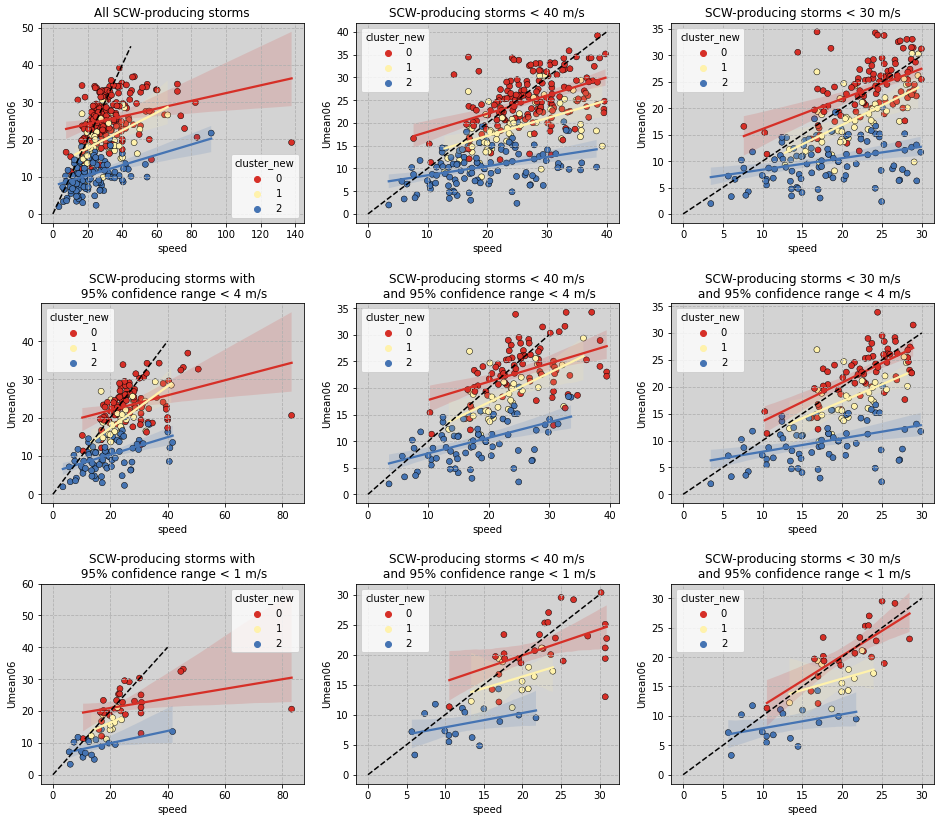

In [18]:
plt.figure(figsize=[16,14])

p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]

ax=plt.subplot(3,3,1)
sns.scatterplot(data=df,x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("cluster_new==0"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("cluster_new==1"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("cluster_new==2"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,45],[0,45],color="k",ls="--")
ax.grid(ls="--")
plt.title("All SCW-producing storms")

ax=plt.subplot(3,3,2)
sns.scatterplot(data=df.query("(speed<40)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed<40) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed<40) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed<40) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 40 m/s")

ax=plt.subplot(3,3,3)
sns.scatterplot(data=df.query("(speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed<30) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed<30) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed<30) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 30 m/s")

ax=plt.subplot(3,3,4)
sns.scatterplot(data=df.query("(speed_rnge<4)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms with\n 95% confidence range < 4 m/s")

ax=plt.subplot(3,3,5)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<40)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<40) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<40) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<40) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 40 m/s\n and 95% confidence range < 4 m/s")

ax=plt.subplot(3,3,6)
sns.scatterplot(data=df.query("(speed_rnge<4) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<4) & (speed<30) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 30 m/s\n and 95% confidence range < 4 m/s")

ax=plt.subplot(3,3,7)
sns.scatterplot(data=df.query("(speed_rnge<1)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<1) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<1) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<1) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,40],[0,40],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms with\n 95% confidence range < 1 m/s")

ax=plt.subplot(3,3,8)
sns.scatterplot(data=df.query("(speed_rnge<1) & (speed<40)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<1) & (speed<40) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<1) & (speed<40) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<1) & (speed<40) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 40 m/s\n and 95% confidence range < 1 m/s")

ax=plt.subplot(3,3,9)
sns.scatterplot(data=df.query("(speed_rnge<1) & (speed<30)"),x="speed",y="Umean06",ax=ax,hue="cluster_new",palette=p,edgecolor="k")
sns.regplot(data=df.query("(speed_rnge<1) & (speed<30) & (cluster_new==0)"),x="speed",y="Umean06",scatter=False,color=p[0],ax=ax)
sns.regplot(data=df.query("(speed_rnge<1) & (speed<30) & (cluster_new==1)"),x="speed",y="Umean06",scatter=False,color=p[1],ax=ax)
sns.regplot(data=df.query("(speed_rnge<1) & (speed<30) & (cluster_new==2)"),x="speed",y="Umean06",scatter=False,color=p[2],ax=ax)
ax.set_facecolor("lightgray")
ax.plot([0,30],[0,30],color="k",ls="--")
ax.grid(ls="--")
plt.title("SCW-producing storms < 30 m/s\n and 95% confidence range < 1 m/s")

plt.subplots_adjust(hspace=0.4)

Wind gust ratios (measured gust / storm speed) - note only speeds 
estimated within 4 m/s (95% CI) and less than 50 m/s are used

Sherburn (2021) winter - 1.02, 1.20, 1.48
Sherburn (2021) summer - 1.28, 1.58, 2.03



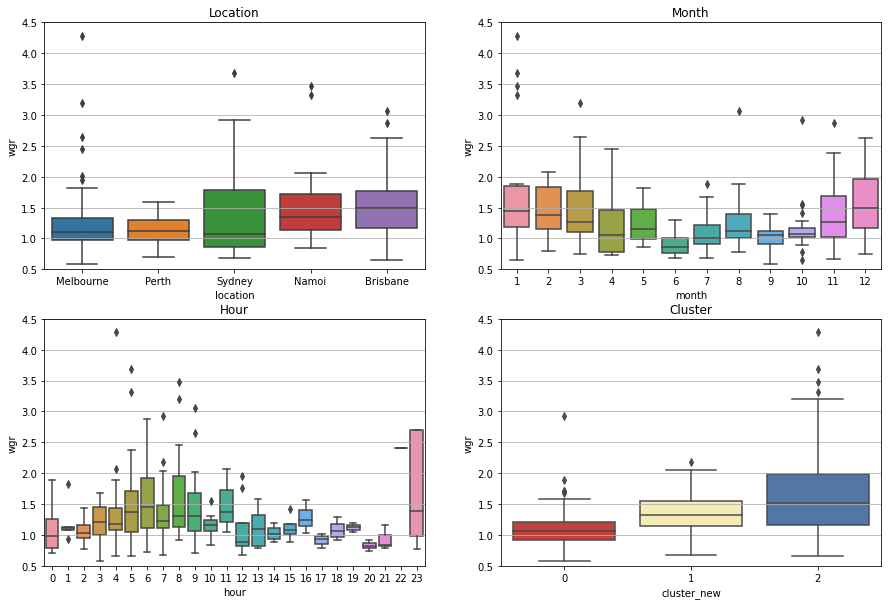

In [15]:
#Wind gust ratios (Sherburn 2021). Note that we are using thunderstorm speed here, rather than outflow speed

plt.figure(figsize=[15,10])

ax=plt.subplot(2,2,1)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="location",y="wgr")
plt.ylim([0.5,4.5])
plt.title("Location")
ax.grid(axis="y")

ax=plt.subplot(2,2,2)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="month",y="wgr",)
plt.ylim([0.5,4.5])
plt.title("Month")
ax.grid(axis="y")

ax=plt.subplot(2,2,3)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="hour",y="wgr",)
plt.ylim([0.5,4.5])
plt.title("Hour")
ax.grid(axis="y")

ax=plt.subplot(2,2,4)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="cluster_new",y="wgr",palette=p)
plt.ylim([0.5,4.5])
plt.title("Cluster")
ax.grid(axis="y")

print("Wind gust ratios (measured gust / storm speed) - note only speeds \nestimated within 4 m/s (95% CI) and less than 50 m/s are used\n")


print("Sherburn (2021) winter - 1.02, 1.20, 1.48")
print("Sherburn (2021) summer - 1.28, 1.58, 2.03\n")

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_wgr.jpeg",dpi=1000,bbox_inches="tight")

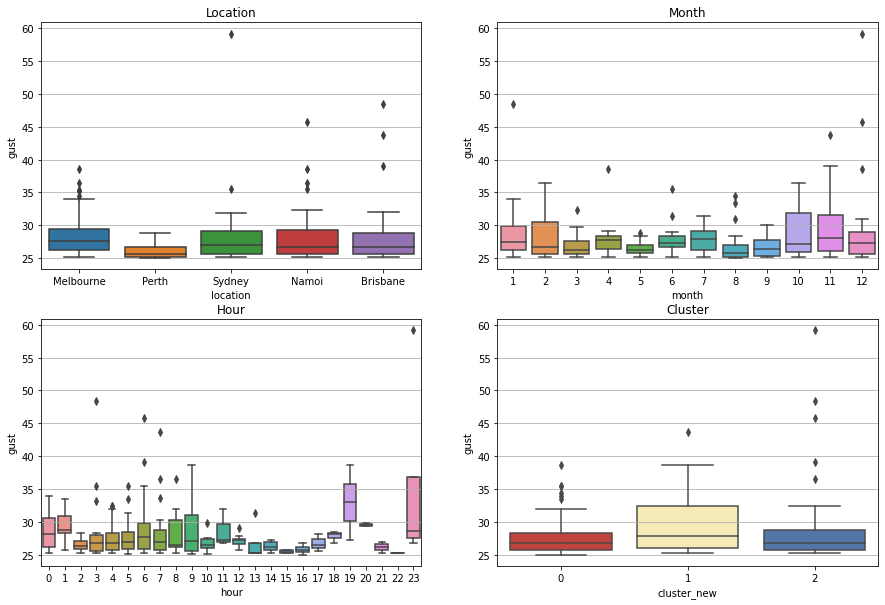

In [112]:
#Wind gust ratios (Sherburn 2021). Note that we are using thunderstorm speed here, rather than outflow speed

plt.figure(figsize=[15,10])

ax=plt.subplot(2,2,1)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="location",y="gust")
plt.title("Location")
ax.grid(axis="y")

ax=plt.subplot(2,2,2)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="month",y="gust",)
plt.title("Month")
ax.grid(axis="y")

ax=plt.subplot(2,2,3)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="hour",y="gust",)
plt.title("Hour")
ax.grid(axis="y")

ax=plt.subplot(2,2,4)
sns.boxplot(data=df.query("(speed_rnge<4) & (speed<50)"),x="cluster_new",y="gust",palette=p)
plt.title("Cluster")
ax.grid(axis="y")

plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/scws_gust_dist.jpeg",dpi=1000,bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

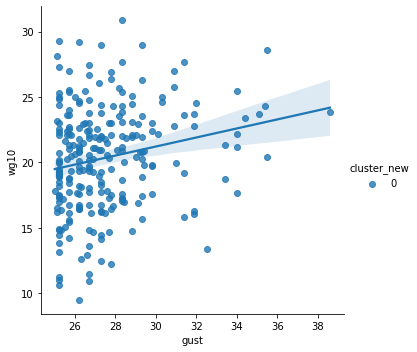

<Figure size 432x288 with 0 Axes>

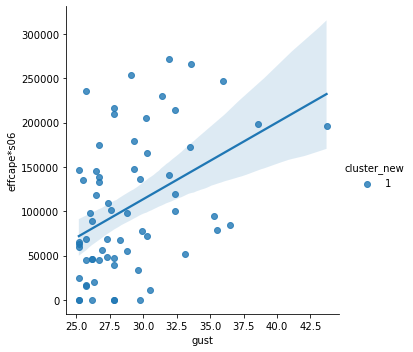

<Figure size 432x288 with 0 Axes>

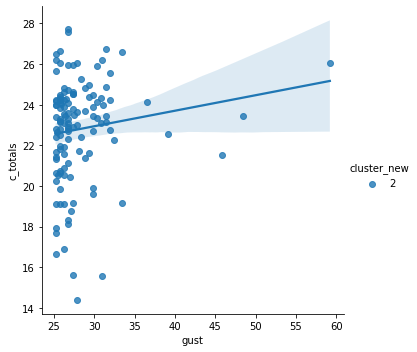

In [108]:
plt.figure();sns.lmplot(data=df.query("cluster_new==0"),x="gust",y="wg10",hue="cluster_new")
plt.figure();sns.lmplot(data=df.query("cluster_new==1"),x="gust",y="effcape*s06",hue="cluster_new")
plt.figure();sns.lmplot(data=df.query("cluster_new==2"),x="gust",y="c_totals",hue="cluster_new")

<AxesSubplot:xlabel='gust', ylabel='Probability'>

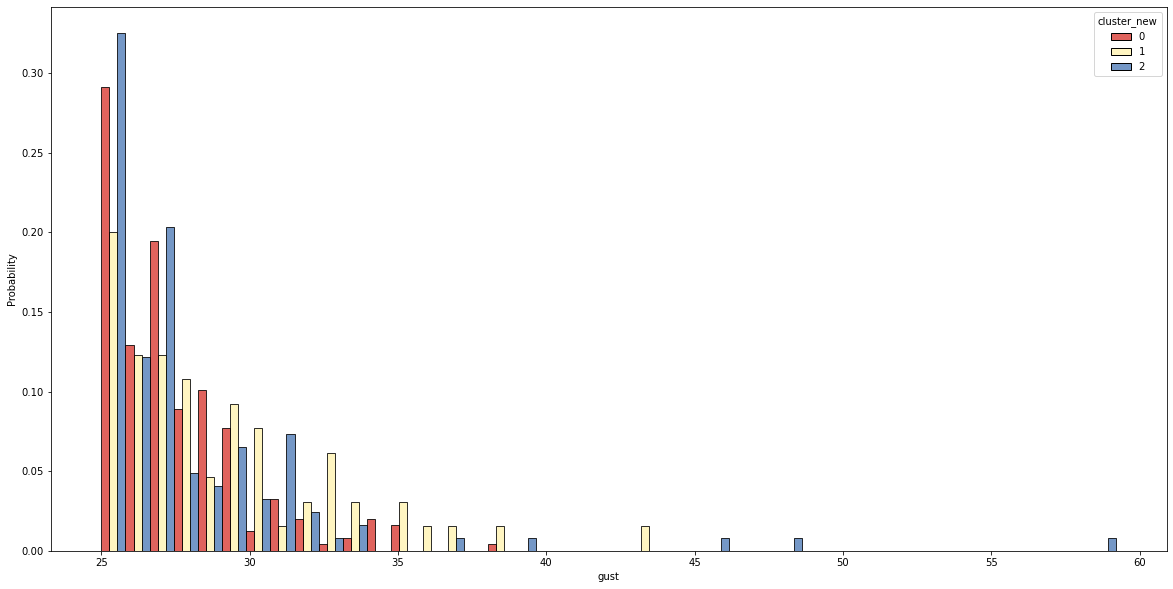

In [127]:
plt.figure(figsize=[20,10])
sns.histplot(data=df,x="gust",hue="cluster_new",multiple="dodge",common_norm=False,stat="probability",palette=[plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]])

In [1]:
melb_scw

NameError: name 'melb_scw' is not defined